# Problem Set 4

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import statsmodels.api as sm

In [30]:
# Moon theme color palette
moon_heading = '#EEE8D5'
moon_blue = '#012B36'  # Deep blue
moon_accent = '#2082C3'  # Lighter blue accent
moon_text = '#94A0A1'  # Grey

In [2]:
concentration = pd.read_csv("./data/sectorconcentration.csv")
markups = pd.read_csv("./data/sectormarkups.csv")

In [5]:
concentration.head()

,year,naics_4,dherfindahl
0,2001,111339,-0.012157
1,2002,111339,0.000619
2,2003,111339,-0.017560
3,2004,111339,-0.005454
4,2005,111339,-0.006647


In [6]:
markups.head()

,year,naics_4,dmarkup
0,2001,111339,0.011806
1,2002,111339,0.010952
2,2003,111339,-0.018640
3,2004,111339,-0.025250
4,2005,111339,-0.009341


In [7]:
# merge the two datasets on year and naics_4
data = pd.merge(concentration, markups, on=["year", "naics_4"])

### Summary statistics

In [12]:
data[['dherfindahl', 'dmarkup']].describe()

,dherfindahl,dmarkup
count,2940.000000,2940.000000
mean,0.006574,0.001570
std,0.072550,0.029335
min,-0.494535,-0.099505
25%,-0.006559,-0.013762
50%,0.000000,0.001697
75%,0.011691,0.017090
max,0.623492,0.099744


### Histograms

/var/folders/mh/f7pm6fzn655fqkxvm3d_gcq80000gn/T/ipykernel_4806/1987506606.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


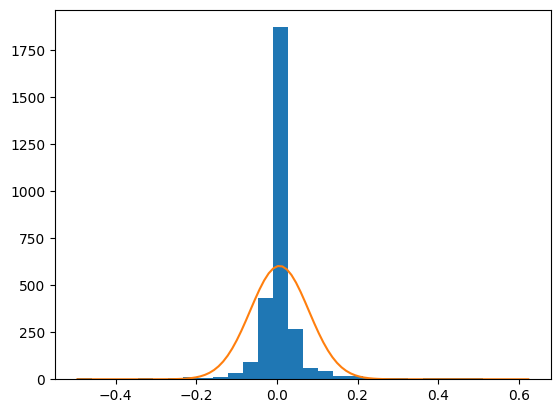

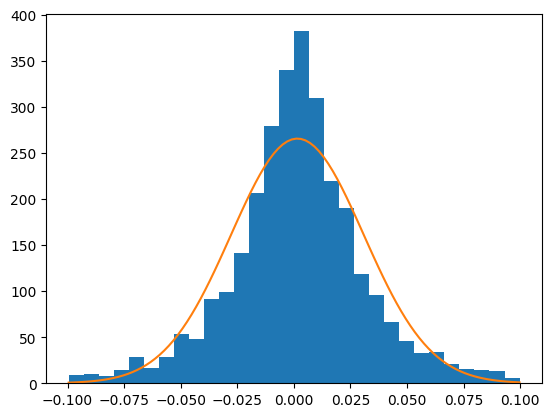

In [43]:
def plot_histogram(data, column, bins=30):
    
    fig, ax = plt.subplots()

    ax.hist(data[column], bins=bins, zorder=1)
    
    mu, sigma = data[column].mean(), data[column].std()
    
    x = np.linspace(data[column].min(), data[column].max(), 100)
    p = norm.pdf(x, mu, sigma)
    
    ax.plot(x, p * len(data[column]) * (data[column].max() - data[column].min()) / bins, zorder=2)
    
    fig.show()

plot_histogram(data, 'dherfindahl')
plot_histogram(data, 'dmarkup')

# Winsorising the data

In [44]:
# winsorize the data
data['dherfindahl_win'] = data['dherfindahl'].clip(lower=data['dherfindahl'].quantile(0.01), upper=data['dherfindahl'].quantile(0.99))
data['dmarkup_win'] = data['dmarkup'].clip(lower=data['dmarkup'].quantile(0.01), upper=data['dmarkup'].quantile(0.99))

### Correlation matrix

In [49]:
# Calculate the correlation between the original and winsorized data
correlation_matrix = data[['dherfindahl', 'dherfindahl_win', 'dmarkup', 'dmarkup_win']].corr()
correlation_matrix

,dherfindahl,dherfindahl_win,dmarkup,dmarkup_win
dherfindahl,1.000000,0.978350,0.034899,0.033788
dherfindahl_win,0.978350,1.000000,0.037002,0.035817
dmarkup,0.034899,0.037002,1.000000,0.998795
dmarkup_win,0.033788,0.035817,0.998795,1.000000


In [53]:
# Regress dherfindahl on dmarkup
X = data['dmarkup']
X = sm.add_constant(X)
y = data['dherfindahl']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            dherfindahl   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.583
Date:                Sun, 16 Feb 2025   Prob (F-statistic):             0.0585
Time:                        17:04:50   Log-Likelihood:                 3543.6
No. Observations:                2940   AIC:                            -7083.
Df Residuals:                    2938   BIC:                            -7071.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0064      0.001      4.807      0.0

In [54]:
X = data['dmarkup_win']
X = sm.add_constant(X)
y = data['dherfindahl_win']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        dherfindahl_win   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.774
Date:                Sun, 16 Feb 2025   Prob (F-statistic):             0.0522
Time:                        17:04:55   Log-Likelihood:                 4004.4
No. Observations:                2940   AIC:                            -8005.
Df Residuals:                    2938   BIC:                            -7993.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0066      0.001      5.798      

<module 'matplotlib.pyplot' from '/Users/oliver/.pyenv/versions/3.13.0/lib/python3.13/site-packages/matplotlib/pyplot.py'>

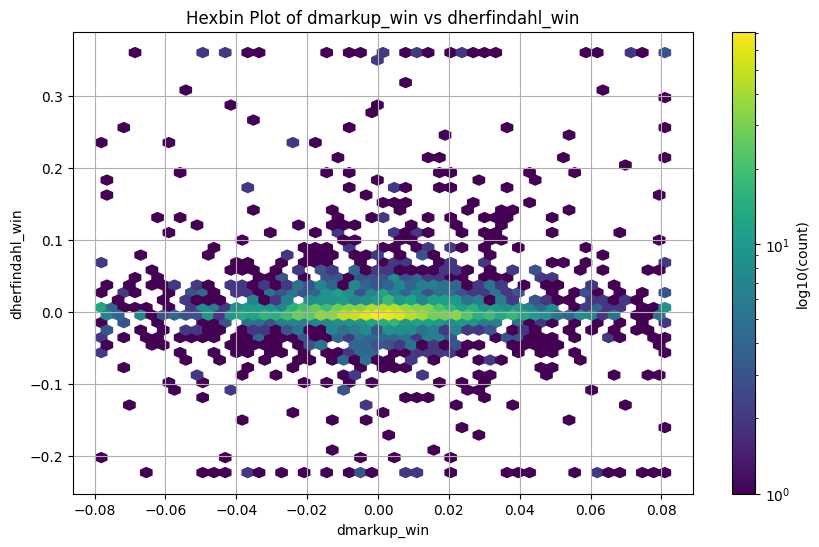

In [72]:
def create_hexbin_plot(df, x_var='dmarkup_win', y_var='dherfindahl_win', figsize=(10, 6)):

    plt.figure(figsize=figsize)
    
    # Create hexbin plot
    plt.hexbin(df[x_var], df[y_var], 
               gridsize=50,           # Number of bins
               mincnt=1,             # Minimum points for a bin to be colored
               bins='log')           # Use log scale for coloring
    
    # Add a colorbar
    plt.colorbar(label='log10(count)')
    plt.grid()
    
    # Customize labels and title
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.title(f'Hexbin Plot of {x_var} vs {y_var}')
    
    return plt

create_hexbin_plot(data)